In [2]:
using JLD2
using PlotlyJS
using Optim
 

#### Manually going over each length again and denoting the minima (with abs()^2 this time & perhaps level sigma')

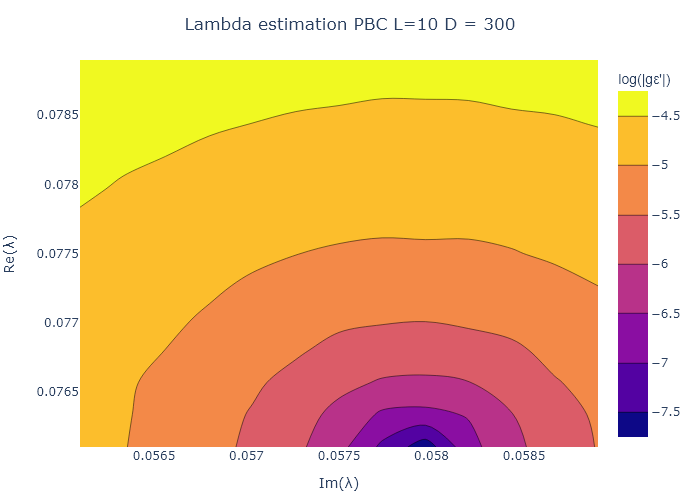

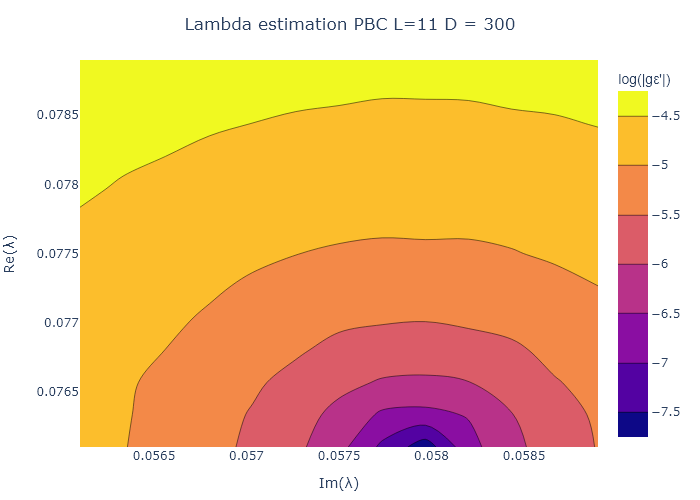

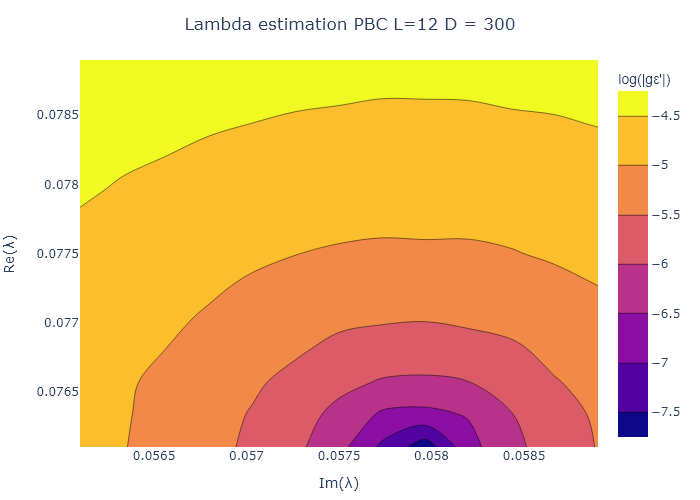

In [16]:
Δε = 0.465613165838194 - 0.224494536412444im
ΔL1ε = 1.465613165838194 - 0.224494536412444im
Δσ =0.133596708540452 - 0.0204636065293973im
ΔL1σ =1.133596708540452 - 0.0204636065293973im
Cε_primeσσ = 0.0658 + 0.0513im 
Cε_primeεε = 0.8791 − 0.1404im
Δε_prime = 1.90830177556852 - 0.598652097099851im
AL1εε_prime = 1+Δε_prime*(Δε_prime -2)/(4*Δε)
AL1σε_prime = 1+Δε_prime*(Δε_prime -2)/(4*Δσ)

N = 7

test_values = zeros(ComplexF64,(2*N-1)^2)

l = length(test_values)

distx = 0.0014## distance from centre in real

disty = 0.0014# distance from centre in imaginary

cent_im = 0.0575im

cent_r = 0.0775
test_values = zeros(ComplexF64,(2*N-1)^2)
g = [] 
### changed this slightly to allow for any parameter N to cross at 0.079 + 0.060i point -> its 2N-1 parameter square now (for any N)
for i in 1:1:(2*N-1)
    if div(i,2) == 1
        for j in 1:1:(2*N-1)
            if i <N+1
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i])  .+cent_r+ 1im*LinRange(-disty,0.00,N)[j] .+cent_im
                else 
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i])  .+cent_r + 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N] .+cent_im
                end
            else
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N]) .+cent_r  + 1im*LinRange(-disty,0.00,N)[j]  .+cent_im
                else
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N])  .+cent_r+ 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N].+cent_im
                end
            end 
        end
    else
        for j in (2*N-1):-1:1
            if i <N+1
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i]) .+cent_r+ 1im*LinRange(-disty,0.00,N)[j] .+cent_im
                else 
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i])  .+cent_r + 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N] .+cent_im
                end
            else
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N]) .+cent_r + 1im*LinRange(-disty,0.00,N)[j] .+cent_im
                else
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N])   .+cent_r + 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N] .+cent_im
                end
            end 
        end
    end
end

for L in [10,11,12]
for lambda in test_values
lambda_txt = round(lambda,digits = 6)

    
results = load_object("lambda_est/Lambda_est_precise/PBC/PBC_D_300/L$L/5E_PBC_L=$L"*"_$lambda_txt.jld2")
ΔEε = results[2]
ΔEL1ε = results[3]
ΔEσ =  results[end-1]
ΔEL1σ = results[end]

    
fun(x) = abs((x[1]+1im*x[3])*(ΔEε) - Δε -Cε_primeεε* (x[2]+1im*x[4]))^2 +abs((x[1]+1im*x[3])*(ΔEσ) - Δσ -Cε_primeσσ*  (x[2]+1im*x[4]))^2     +abs((x[1]+1im*x[3])*(ΔEL1ε) -ΔL1ε  -Cε_primeεε* AL1εε_prime* (x[2]+1im*x[4]))^2#+abs((x[1]+1im*x[3])*(ΔEL1σ) -ΔL1σ  -Cε_primeσσ* AL1σε_prime* (x[2]+1im*x[4]))^2   
res = optimize(fun, [0.0, 0.0,0.0,0.0])
gε_prime = Optim.minimizer(res)[2]+1im* Optim.minimizer(res)[4]
push!(g,gε_prime )

end
z_values = log.(abs.(g))
    p = PlotlyJS.plot(PlotlyJS.contour(   z=z_values,
         x=real(-im*test_values),
             y=real(test_values),fill=true,colorbar=attr(
                 title="log(|gε'|)", # title here
                titleside="top",
                titlefont=attr(
                  size=14,
                  family="Arial, sans-serif"
              )
             )),Layout(title=attr(text = "Lambda estimation PBC L=$L D = 300",x = 0.5),xaxis_title="Im(λ)",yaxis_title="Re(λ)")
     )
    display(p)
end

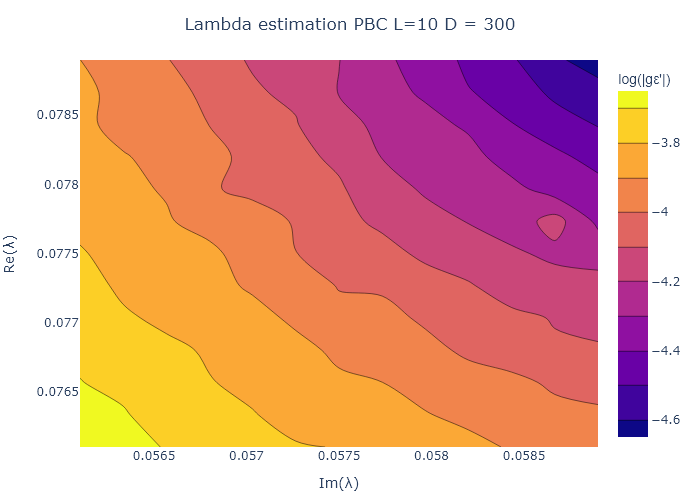

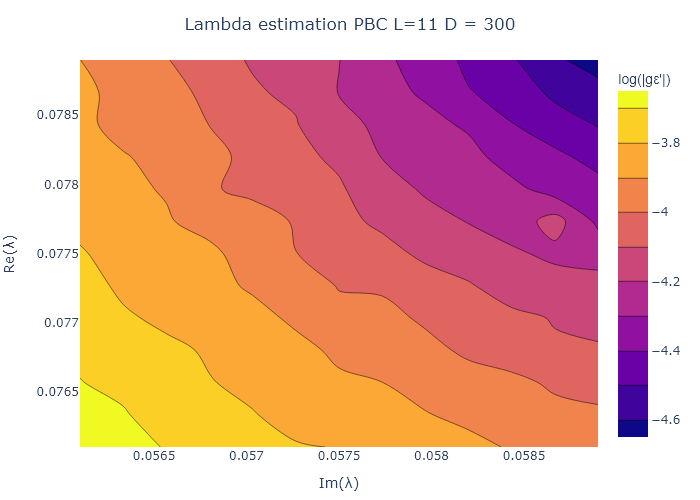

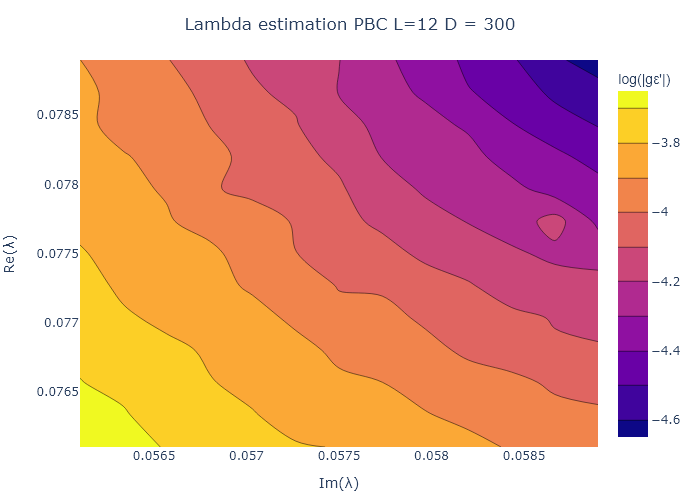

In [ ]:
Δε = 0.465613165838194 - 0.224494536412444im
ΔL1ε = 1.465613165838194 - 0.224494536412444im
Δσ =0.133596708540452 - 0.0204636065293973im
ΔL1σ =1.133596708540452 - 0.0204636065293973im
Cε_primeσσ = 0.0658 + 0.0513im 
Cε_primeεε = 0.8791 − 0.1404im
Δε_prime = 1.90830177556852 - 0.598652097099851im
AL1εε_prime = 1+Δε_prime*(Δε_prime -2)/(4*Δε)
AL1σε_prime = 1+Δε_prime*(Δε_prime -2)/(4*Δσ)

N = 7

test_values = zeros(ComplexF64,(2*N-1)^2)

l = length(test_values)

distx = 0.0014## distance from centre in real

disty = 0.0014# distance from centre in imaginary

cent_im = 0.0575im

cent_r = 0.0775
test_values = zeros(ComplexF64,(2*N-1)^2)
g = [] 
### changed this slightly to allow for any parameter N to cross at 0.079 + 0.060i point -> its 2N-1 parameter square now (for any N)
for i in 1:1:(2*N-1)
    if div(i,2) == 1
        for j in 1:1:(2*N-1)
            if i <N+1
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i])  .+cent_r+ 1im*LinRange(-disty,0.00,N)[j] .+cent_im
                else 
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i])  .+cent_r + 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N] .+cent_im
                end
            else
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N]) .+cent_r  + 1im*LinRange(-disty,0.00,N)[j]  .+cent_im
                else
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N])  .+cent_r+ 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N].+cent_im
                end
            end 
        end
    else
        for j in (2*N-1):-1:1
            if i <N+1
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i]) .+cent_r+ 1im*LinRange(-disty,0.00,N)[j] .+cent_im
                else 
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i])  .+cent_r + 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N] .+cent_im
                end
            else
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N]) .+cent_r + 1im*LinRange(-disty,0.00,N)[j] .+cent_im
                else
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N])   .+cent_r + 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N] .+cent_im
                end
            end 
        end
    end
end

for L in [10,11,12]
for lambda in test_values
lambda_txt = round(lambda,digits = 6)

    
results = load_object("lambda_est/Lambda_est_precise/PBC/PBC_D_300/L$L/5E_PBC_L=$L"*"_$lambda_txt.jld2")
ΔEε = results[2]
ΔEL1ε = results[3]
ΔEσ =  results[end-1]
ΔEL1σ = results[end]

    
fun(x) = abs((x[1]+1im*x[3])*(ΔEε) - Δε -Cε_primeεε* (x[2]+1im*x[4]))^2 +abs((x[1]+1im*x[3])*(ΔEσ) - Δσ -Cε_primeσσ*  (x[2]+1im*x[4]))^2   #  +abs((x[1]+1im*x[3])*(ΔEL1ε) -ΔL1ε  -Cε_primeεε* AL1εε_prime* (x[2]+1im*x[4]))^2#+abs((x[1]+1im*x[3])*(ΔEL1σ) -ΔL1σ  -Cε_primeσσ* AL1σε_prime* (x[2]+1im*x[4]))^2   
res = optimize(fun, [0.0, 0.0,0.0,0.0])
gε_prime = Optim.minimizer(res)[2]+1im* Optim.minimizer(res)[4]
push!(g,gε_prime )

end
z_values = log.(abs.(g))
    p = PlotlyJS.plot(PlotlyJS.contour(   z=z_values,
         x=real(-im*test_values),
             y=real(test_values),fill=true,colorbar=attr(
                 title="log(|gε'|)", # title here
                titleside="top",
                titlefont=attr(
                  size=14,
                  family="Arial, sans-serif"
              )
             )),Layout(title=attr(text = "Lambda estimation PBC L=$L D = 300",x = 0.5),xaxis_title="Im(λ)",yaxis_title="Re(λ)")
     )
    display(p)
end


Lowest levels
10:  0.0759 + 0.05796667im
11: 0.0763333 + 0.058433333im


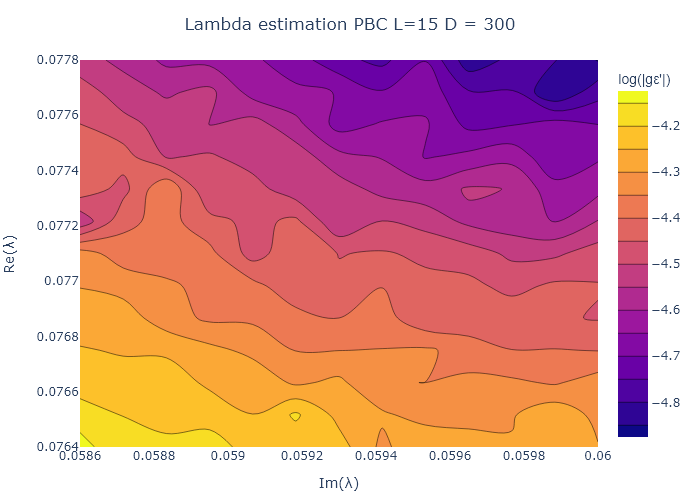

In [22]:

N = 7

test_values = zeros(ComplexF64,(2*N-1)^2)



test_values = zeros(ComplexF64,(2*N-1)^2)

l = length(test_values)


distx = 0.0007## distance from centre in real

disty = 0.0007# distance from centre in imaginary

cent_im = 0.0593im

cent_r = 0.0771
test_values = zeros(ComplexF64,(2*N-1)^2)
g = [] 
### changed this slightly to allow for any parameter N to cross at 0.079 + 0.060i point -> its 2N-1 parameter square now (for any N)
for i in 1:1:(2*N-1)
    if div(i,2) == 1
        for j in 1:1:(2*N-1)
            if i <N+1
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i])  .+cent_r+ 1im*LinRange(-disty,0.00,N)[j] .+cent_im
                else 
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i])  .+cent_r + 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N] .+cent_im
                end
            else
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N]) .+cent_r  + 1im*LinRange(-disty,0.00,N)[j]  .+cent_im
                else
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N])  .+cent_r+ 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N].+cent_im
                end
            end 
        end
    else
        for j in (2*N-1):-1:1
            if i <N+1
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i]) .+cent_r+ 1im*LinRange(-disty,0.00,N)[j] .+cent_im
                else 
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i])  .+cent_r + 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N] .+cent_im
                end
            else
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N]) .+cent_r + 1im*LinRange(-disty,0.00,N)[j] .+cent_im
                else
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N])   .+cent_r + 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N] .+cent_im
                end
            end 
        end
    end
end

for L in [15,]
for lambda in test_values
lambda_txt = round(lambda,digits = 6)
results = load_object("lambda_est/Lambda_est_precise/PBC/PBC_D_300/L$L/5E_PBC_L=$L"*"_$lambda_txt.jld2")
ΔEε = results[2]
ΔEL1ε = results[3]
ΔEσ =  results[end-1]
ΔEL1σ = results[end]

    
fun(x) = abs((x[1]+1im*x[3])*(ΔEε) - Δε -Cε_primeεε* (x[2]+1im*x[4]))^2 +abs((x[1]+1im*x[3])*(ΔEσ) - Δσ -Cε_primeσσ*  (x[2]+1im*x[4]))^2#+abs((x[1]+1im*x[3])*(ΔEL1ε) -ΔL1ε  -Cε_primeεε* AL1εε_prime* (x[2]+1im*x[4]))^2#+abs((x[1]+1im*x[3])*(ΔEL1σ) -ΔL1σ  -Cε_primeσσ* AL1σε_prime* (x[2]+1im*x[4]))^2
        
res = optimize(fun, [0.0, 0.0,0.0,0.0])
gε_prime = Optim.minimizer(res)[2]+1im* Optim.minimizer(res)[4]
push!(g,gε_prime )

end
z_values = log.(abs.(g))
    p = PlotlyJS.plot(PlotlyJS.contour(   z=z_values,
         x=real(-im*test_values),
             y=real(test_values),fill=true,colorbar=attr(
                 title="log(|gε'|)", # title here
                titleside="top",
                titlefont=attr(
                  size=14,
                  family="Arial, sans-serif"
              )
             )),Layout(title=attr(text = "Lambda estimation PBC L=$L D = 300",x = 0.5),xaxis_title="Im(λ)",yaxis_title="Re(λ)")
     )
    display(p)
end

L = 12: 0.05888333im + 0.0767
L = 13 : 0.0591333im + 0.07693333
L = 14:  0.0593im + 0.0773
L = 15: 0.05965im + 0.077333
L = 16 : 0.0597667im + 0.07745
L = 17: 0.05988833im + 0.07759833333

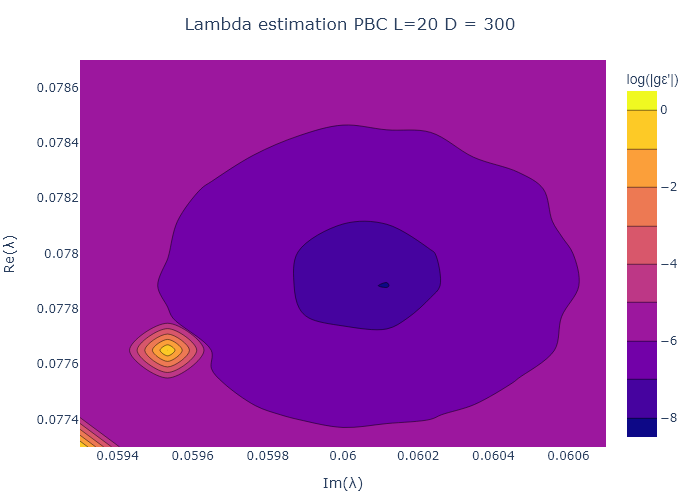

In [ ]:
L = 20
N = 7

test_values = zeros(ComplexF64,(2*N-1)^2)

l = length(test_values)

distx = 0.0007## distance from centre in real

disty = 0.0007# distance from centre in imaginary

cent_im = 0.0600im

cent_r = 0.0780

test_values = zeros(ComplexF64,(2*N-1)^2)
g = [] 
### changed this slightly to allow for any parameter N to cross at 0.079 + 0.060i point -> its 2N-1 parameter square now (for any N)
for i in 1:1:(2*N-1)
    if div(i,2) == 1
        for j in 1:1:(2*N-1)
            if i <N+1
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i])  .+cent_r+ 1im*LinRange(-disty,0.00,N)[j] .+cent_im
                else 
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i])  .+cent_r + 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N] .+cent_im
                end
            else
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N]) .+cent_r  + 1im*LinRange(-disty,0.00,N)[j]  .+cent_im
                else
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N])  .+cent_r+ 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N].+cent_im
                end
            end 
        end
    else
        for j in (2*N-1):-1:1
            if i <N+1
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i]) .+cent_r+ 1im*LinRange(-disty,0.00,N)[j] .+cent_im
                else 
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i])  .+cent_r + 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N] .+cent_im
                end
            else
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N]) .+cent_r + 1im*LinRange(-disty,0.00,N)[j] .+cent_im
                else
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N])   .+cent_r + 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N] .+cent_im
                end
            end 
        end
    end
end


for lambda in test_values
lambda_txt = round(lambda,digits =6)
if lambda_txt == 0.0773 +0.0593im ||lambda_txt == 0.07765+0.059533im||lambda_txt == 0.078583+0.05941im
    results = [0,0,0,0,0,0]
else
results = load_object("Section3.2/lambda_est/Lambda_est_precise/PBC/PBC_D_400/5E_PBC_L=$L"*"_$lambda_txt.jld2")
end
ΔEε = results[2]
ΔEL1ε = results[3]
ΔEσ =  results[end-1]
ΔEL1σ = results[end]

    
fun(x) = abs((x[1]+1im*x[3])*(ΔEε) - Δε -Cε_primeεε* (x[2]+1im*x[4]))^2 +abs((x[1]+1im*x[3])*(ΔEσ) - Δσ -Cε_primeσσ*  (x[2]+1im*x[4]))^2+abs((x[1]+1im*x[3])*(ΔEL1ε) -ΔL1ε  -Cε_primeεε* AL1εε_prime* (x[2]+1im*x[4]))^2#+abs((x[1]+1im*x[3])*(ΔEL1σ) -ΔL1σ  -Cε_primeσσ* AL1σε_prime* (x[2]+1im*x[4]))^2
        
res = optimize(fun, [0.0, 0.0,0.0,0.0])
gε_prime = Optim.minimizer(res)[2]+1im* Optim.minimizer(res)[4]
push!(g,gε_prime )

end
z_values = log.(abs.(g))
    p = PlotlyJS.plot(PlotlyJS.contour(   z=z_values,
         x=real(-im*test_values),
             y=real(test_values),fill=true,colorbar=attr(
                 title="log(|gε'|)", # title here
                titleside="top",
                titlefont=attr(
                  size=14,
                  family="Arial, sans-serif"
              )
             )),Layout(title=attr(text = "Lambda estimation PBC L=$L D = 300",x = 0.5),xaxis_title="Im(λ)",yaxis_title="Re(λ)")
     )
    display(p)

L 18 (chi = 400): 0.07777667 +0.059883333im
L 19 (chi = 400): 0.07777667 +0.06000im
L 20 (chi = 400): 0.0778833 +0.0601167im

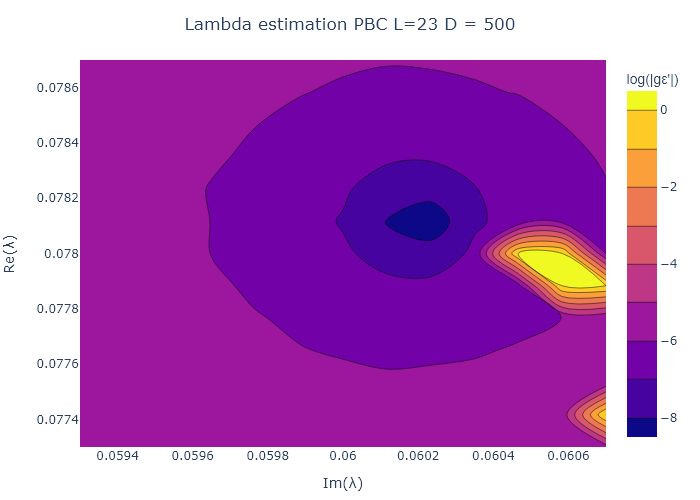

In [114]:
L = 23
N = 7

test_values = zeros(ComplexF64,(2*N-1)^2)

l = length(test_values)

distx = 0.0007## distance from centre in real

disty = 0.0007# distance from centre in imaginary

cent_im = 0.0600im

cent_r = 0.0780

test_values = zeros(ComplexF64,(2*N-1)^2)
g = [] 
### changed this slightly to allow for any parameter N to cross at 0.079 + 0.060i point -> its 2N-1 parameter square now (for any N)
for i in 1:1:(2*N-1)
    if div(i,2) == 1
        for j in 1:1:(2*N-1)
            if i <N+1
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i])  .+cent_r+ 1im*LinRange(-disty,0.00,N)[j] .+cent_im
                else 
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i])  .+cent_r + 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N] .+cent_im
                end
            else
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N]) .+cent_r  + 1im*LinRange(-disty,0.00,N)[j]  .+cent_im
                else
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N])  .+cent_r+ 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N].+cent_im
                end
            end 
        end
    else
        for j in (2*N-1):-1:1
            if i <N+1
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i]) .+cent_r+ 1im*LinRange(-disty,0.00,N)[j] .+cent_im
                else 
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(-distx,0.00,N)[i])  .+cent_r + 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N] .+cent_im
                end
            else
                if j<N+1
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N]) .+cent_r + 1im*LinRange(-disty,0.00,N)[j] .+cent_im
                else
                    test_values[i+(j-1)*(2*N-1)] =  (LinRange(distx/(N-1),distx+distx/(N-1),N)[i-N])   .+cent_r + 1im*LinRange(disty/(N-1),disty+disty/(N-1),N)[j-N] .+cent_im
                end
            end 
        end
    end
end

for lambda in test_values
lambda_txt = round(lambda,digits =6)
if lambda_txt == 0.078 + 0.060583im||lambda_txt == 0.078 + 0.060467im ||lambda_txt == 0.077883 + 0.060583im || lambda_txt ==0.077417 + 0.0607im || lambda_txt == 0.077883 + 0.0607im
    ΔEε = 0
ΔEL1ε = 0
ΔEσ =  0
ΔEL1σ = 0
else

 results0 = load_object("Section3.2/lambda_est/Lambda_est_precise/PBC/PBC_D_500/L$L/5EXC0_PBC_L=$L"*"_$lambda_txt"*"_D100.jld2")
results1 = load_object("Section3.2/lambda_est/Lambda_est_precise/PBC/PBC_D_500/L$L/5EXC0_PBC_L=$L"*"_$lambda_txt"*"_D100.jld2")
results2 = load_object("Section3.2/lambda_est/Lambda_est_precise/PBC/PBC_D_500/L$L/5EXC1_PBC_L=$L"*"_$lambda_txt"*"_D100.jld2")
ΔEε = results1[2][1]
ΔEL1ε = results1[2][2]
ΔEσ =  results2[2][end-1]
ΔEL1σ = results2[2][end]
end


    
fun(x) = abs((x[1]+1im*x[3])*(ΔEε) - Δε -Cε_primeεε* (x[2]+1im*x[4]))^2 +abs((x[1]+1im*x[3])*(ΔEσ) - Δσ -Cε_primeσσ*  (x[2]+1im*x[4]))^2+abs((x[1]+1im*x[3])*(ΔEL1ε) -ΔL1ε  -Cε_primeεε* AL1εε_prime* (x[2]+1im*x[4]))^2#+abs((x[1]+1im*x[3])*(ΔEL1σ) -ΔL1σ  -Cε_primeσσ* AL1σε_prime* (x[2]+1im*x[4]))^2
        
res = optimize(fun, [0.0, 0.0,0.0,0.0])
gε_prime = Optim.minimizer(res)[2]+1im* Optim.minimizer(res)[4]
push!(g,gε_prime )

end
z_values = log.(abs.(g))
    p = PlotlyJS.plot(PlotlyJS.contour(   z=z_values,
         x=real(-im*test_values),
             y=real(test_values),fill=true,colorbar=attr(
                 title="log(|gε'|)", # title here
                titleside="top",
                titlefont=attr(
                  size=14,
                  family="Arial, sans-serif"
              )
             )),Layout(title=attr(text = "Lambda estimation PBC L=$L D = 500",x = 0.5),xaxis_title="Im(λ)",yaxis_title="Re(λ)")
     )
    display(p)

L 18 (500) 0.06im+0.07776
L 19 (500) 0.06im+0.07776
L 20 (500) 0.06im+0.0778833
L 21 (500) 0.06011667im + 0.078
L 22 (500) 0.0601167im + 0.07811667
L 23 (500) 0.0602333im + 0.07811667

a small 5 parameter simulation was run to reveal L = 24

In [5]:
lambda_btm = [0.0759 + 0.05796667im,0.0763333 + 0.058433333im,0.05888333im + 0.0767,0.0591333im + 0.07693333,0.0593im + 0.0772,0.05965im + 0.077333,0.0597667im + 0.07745,0.05988833im + 0.07759833333,0.07776 +0.060im,0.06im+0.07776,0.06im+0.0778833,0.06011667im + 0.078,0.0601167im + 0.07811667,0.0602333im + 0.07811667,0.0602333im + 0.07811667+0.00011667]
L = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

using Plots
using LaTeXStrings
using Measures
p = Plots.plot(real(lambda_btm),imag(lambda_btm),marker = :dot,size = (950,600),color = 1,label = "Cost Function Minimum",xlabel = L"\mathrm{Re}(λ)",ylabel = L"\mathrm{Im}(λ)",legendfontsize = 16,markersize = 6,left_margin = 4mm,bottom_margin = 4mm,dpi = 5000,xguidefontsize = 22,yguidefontsize = 22,xtickfontsize = 12,ytickfontsize = 12,grid = false,linewidth = 2)

using CurveFit
fit = linear_fit(1.0./L.^2, lambda_btm)
println(fit[1])
x = 10:80
Plots.plot!(p,real(fit[1].+fit[2] ./x.^2),imag(fit[1].+fit[2] ./x.^2),linestyle = :dash,label = L"1/L^2"*" fit",color = "red",linewidth= 3)
Plots.scatter!(p,[real(fit[1]),],[imag(fit[1]),],color = "red",marker = :xcross,label = "",markersize = 8)
L = 17:23
lambda_btm = lambda_btm[end-6:end]
fit = linear_fit(1.0./L.^2, lambda_btm)
L = 10:800
Plots.plot!(p,real(fit[1].+fit[2] ./L.^2),imag(fit[1].+fit[2] ./L.^2),linestyle = :dash,label = L"1/L^2"*" fit "* L"L=17-24",color="green",linewidth= 3)
Plots.scatter!(p,[real(fit[1]),],[imag(fit[1]),],color = "green",marker = :xcross,label = "",markersize = 8)
Plots.scatter!(p,[0.0788,],[0.0603,],color = "black",marker = :circle,label = latexstring("\\lambda_{c} = 0.0788 + 0.0603i"),markersize = 8)
L = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
lambda_btm = [0.0759 + 0.05796667im,0.0763333 + 0.058433333im,0.05888333im + 0.0767,0.0591333im + 0.07693333,0.0593im + 0.0772,0.05965im + 0.077333,0.0597667im + 0.07745,0.05988833im + 0.07759833333,0.07776 +0.060im,0.06im+0.07776,0.06im+0.0778833,0.06011667im + 0.078,0.0601167im + 0.07811667,0.0602333im + 0.07811667,0.0602333im + 0.07811667+0.00011667]
for (i,l) in enumerate(L)
    if l == 24
    annotate!(p,[(real(lambda_btm[i]).+0.000237,imag(lambda_btm[i])-0.00008,text(L"L = 24",18))])
    elseif l == 10
      annotate!(p,[(real(lambda_btm[i] .+ 0.0003),imag(lambda_btm[i])+0.000032,text(L"L = 10",18))])
    end
end
Plots.plot!(p,real(lambda_btm),imag(lambda_btm),marker = :dot,size = (950,600),color = 1,title = "",label = "",legendfontsize = 16,markersize = 6,left_margin = 4mm,bottom_margin = 4mm,dpi = 5000,xguidefontsize = 22,yguidefontsize = 22,xtickfontsize = 12,ytickfontsize = 12,grid = false,linewidth = 2)

println(fit[1])
display(p)
Plots.savefig(p,"extre_alt.pdf")

0.0786063714607324 + 0.06076764031155583im
0.07880768103188561 + 0.06053783535211419im


"c:\\Users\\vicva\\OneDrive\\Documenten\\git\\Thesis_CCFT\\Section3.2\\extre_alt.pdf"